In [1]:
import pandas as pd
import plotly.express as px
import streamlit as st

In [2]:
file = "The Beatles songs dataset 285x45 v0.csv"
dt = pd.read_csv(file)

In [4]:
#Usless columns
columns_remove = [
    'URI', 'Time_signature', 'Energy', 'Loudness', 'Instrumentalness',
    'Speechiness', 'Tempo', 'Other releases', 'Single A side',
    'Single B side', 'Single certification', 'Styles', 'Themes',
    'Moods', 'Songwriter(s)', 'Lead vocal(s)', 'Cover', 'Covered by',
    'Chart position UK (Wikipedia)', 'Chart position US (Wikipedia)',
    'Highest position (The Guardian)', 'Weeks on chart in UK (The Guardian)',
    'Weeks at No1 in UK (The Guardian)', 'Highest position (Billboard)',
    'Weeks at No1 (Billboard)', 'Top 50 (Billboard)',
    'Top 50 (Ultimate classic rock)', 'Top 50 (NME)',
    'Top 50 (Top50songs.org)', 'Album', 'Genre',
    'Top 50 (USA today, 2017)', 'Album debut',
    'Top 50 (Vulture, by Bill Wyman)'
]
dt = dt.drop(columns=columns_remove, errors="ignore")


dt['Year'] = pd.to_numeric(dt['Year'], errors='coerce')
dt = dt.dropna(subset=['Year'])
dt['Top 50 (Rolling Stone)'] = pd.to_numeric(dt['Top 50 (Rolling Stone)'], errors='coerce').fillna(0)

In [5]:
# Here I sort whole dataset by year
dt = dt.sort_values(by="Year", ascending=False)

In [9]:
# Basic analyse
print("Basic information")
dt.head(10)

Basic information


,Title,Year,Popularity,Duration,Key,Mode,Valence,Danceability,Acousticness,Liveness,Top 50 (Rolling Stone)
106,I Me Mine,1970.0,57.0,145.0,9.0,0.0,0.525,0.291,0.17900,0.1010,0.0
77,Golden Slumbers,1969.0,70.0,91.0,0.0,1.0,0.239,0.419,0.32600,0.1130,0.0
235,The End,1969.0,59.0,140.0,11.0,0.0,0.222,0.647,0.00101,0.1380,0.0
38,Carry That Weight,1969.0,62.0,96.0,0.0,1.0,0.704,0.543,0.22600,0.2980,0.0
255,Two of Us,1969.0,61.0,213.0,7.0,1.0,0.931,0.726,0.09740,0.2390,0.0
181,Oh! Darling,1969.0,69.0,206.0,4.0,1.0,0.549,0.422,0.01260,0.2680,0.0
43,Come Together,1969.0,81.0,258.0,9.0,0.0,0.187,0.533,0.03020,0.0926,9.0
44,Come and Get It,1969.0,33.0,150.0,4.0,1.0,0.545,0.603,0.00186,0.1290,0.0
182,Old Brown Shoe,1969.0,38.0,196.0,1.0,1.0,0.396,0.529,0.00171,0.1790,0.0
183,One After 909,1969.0,51.0,172.0,4.0,1.0,0.888,0.554,0.03070,0.9070,0.0


In [10]:
print('''I have sorted dataset by year, deleted some columns that do not suit for my purposes,
 replaced NaNs in column Top 50 (Rolling Stones) with 0 
 and deleted songs without realise date (there was only 8, so it did not influence the data).''')
print(f"Strings: {len(dt)}")
print("Here is some basic data about the dataset:")
dt.describe()

I have sorted dataset by year, deleted some columns that do not suit for my purposes,
 replaced NaNs in column Top 50 (Rolling Stones) with 0 
 and deleted songs without realise date (there was only 8, so it did not influence the data).
Strings: 275
Here is some basic data about the dataset:


,Year,Popularity,Duration,Key,Mode,Valence,Danceability,Acousticness,Liveness,Top 50 (Rolling Stone)
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,1965.421818,50.585455,158.454545,4.949091,0.854545,0.695957,0.529382,0.385621,0.226424,4.552727
std,2.441333,14.315111,56.614853,3.368644,0.353201,0.232059,0.130986,0.287278,0.199454,11.572681
min,1958.000000,22.000000,23.000000,0.000000,0.000000,0.037800,0.146000,0.000028,0.037100,0.000000
25%,1963.000000,40.000000,128.000000,2.000000,1.000000,0.567000,0.440000,0.115500,0.100000,0.000000
50%,1965.000000,52.000000,149.000000,4.000000,1.000000,0.740000,0.540000,0.346000,0.142000,0.000000
75%,1968.000000,60.000000,175.000000,8.500000,1.000000,0.886500,0.629000,0.629000,0.281000,0.000000
max,1970.000000,87.000000,502.000000,11.000000,1.000000,0.979000,0.880000,0.992000,0.926000,50.000000


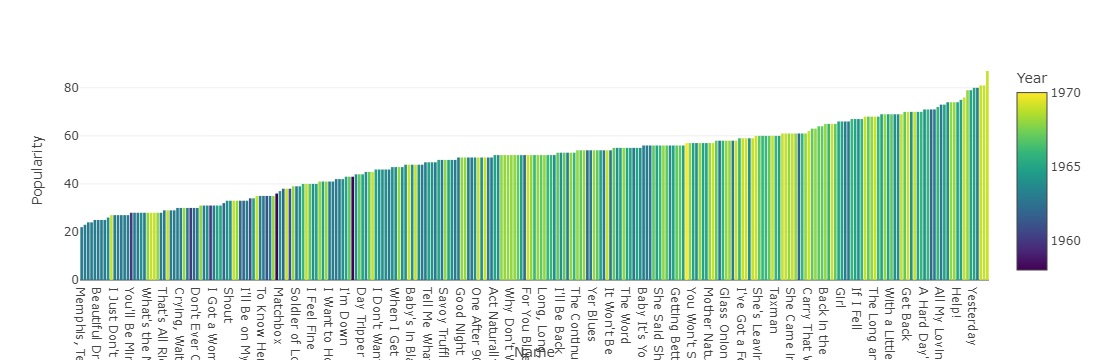

In [16]:
# 1 Chart
# This barchart shows popularity of the songs through the years
dt_sort1 = dt.sort_values(by="Popularity", ascending=True)

print("Popularity of the songs through the years")
fig1 = px.bar(
    dt_sort1,
    x="Title",
    y="Popularity",
    color="Year",  # Added color based on Year
    color_continuous_scale="Viridis",  # Added palette
    labels={"Title": "Name", "Popularity": "Popularity"}
)
fig1.show()
print("Using this graph we can easily find out the most and the least popular song.")

The ratio of major and minor songs


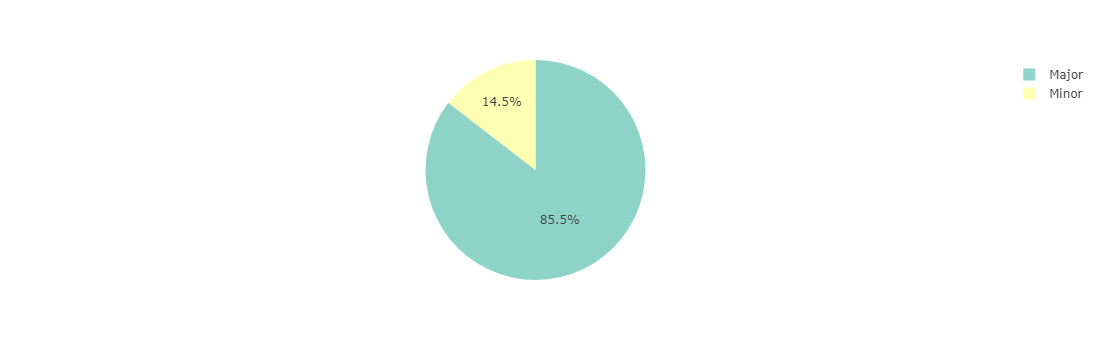

From this diogram we can easily mention that The Beatles prefer major to minor mode.


In [18]:
# 2 Chart
# This pie chart shows us the ratio of major and minor songs
print("The ratio of major and minor songs")
mode_all = dt["Mode"].replace({1: "Major", 0: "Minor"}).value_counts()
fig2 = px.pie(
    values=mode_all.values,
    names=mode_all.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig2.show()
print("From this diogram we can easily mention that The Beatles prefer major to minor mode.")

Songs' duration


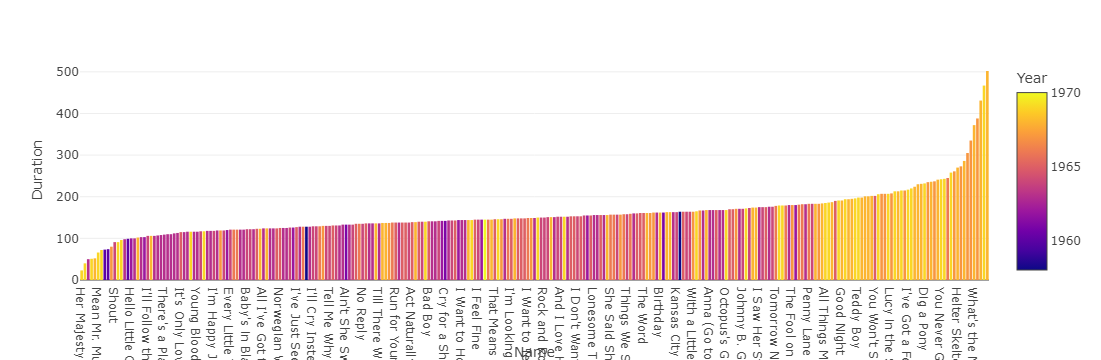

This graph can help us to define the shortest and the longest song


In [19]:
# 3 Chart
# Bar chart that shows songs' duration
dt_sort2 = dt.sort_values(by='Duration', ascending=True)
print("Songs' duration")
fig3 = px.bar(
    dt_sort2,
    x="Title",
    y="Duration",
    color="Year",  # Added color based on Year
    color_continuous_scale="Plasma",  # Added palette
    labels={"Title": "Name", "Duration": "Duration"}
)
fig3.show()
print("This graph can help us to define the shortest and the longest song")

Songs Rolling Stone Top 50


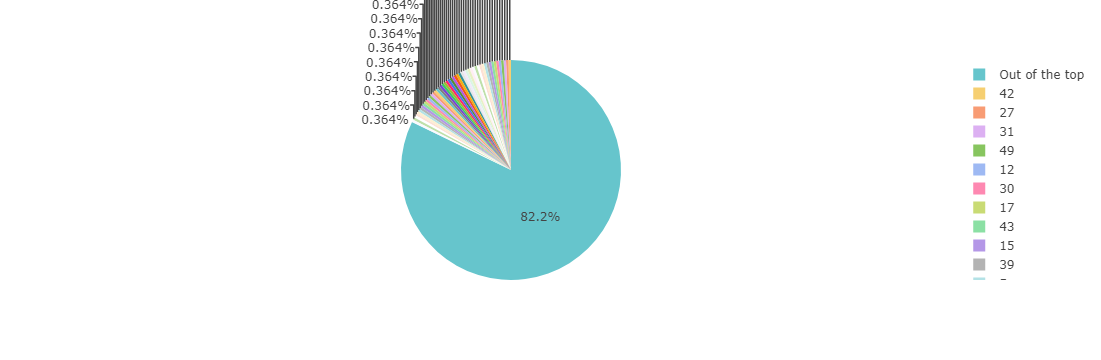

On this piechart we can see how many songs got into the chart and what places they get.


In [20]:
# 4 Chart
# Rolling Stone Top 50
print("Songs Rolling Stone Top 50")
top_all = dt["Top 50 (Rolling Stone)"].value_counts()
fig4 = px.pie(
    values=top_all.values,
    names=[pos if pos != 0 else "Out of the top" for pos in top_all.index],
    color_discrete_sequence=px.colors.qualitative.Pastel  # Added palette
)
fig4.show()
print("On this piechart we can see how many songs got into the chart and what places they get.")

The Beatles' most favorite keys


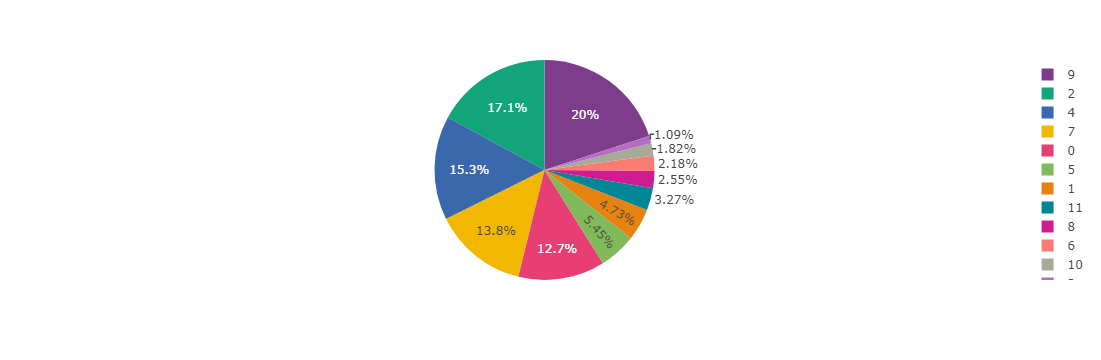

On this diogram one can see what was the most popular key in Beatles' songs


In [21]:
# 5 Chart
# Key of the songs
print("The Beatles' most favorite keys")
key_all = dt["Key"].value_counts()
fig5 = px.pie(
    values=key_all.values,
    names=key_all.index,
    color_discrete_sequence=px.colors.qualitative.Bold  # Added palette
)
fig5.show()
print("On this diogram one can see what was the most popular key in Beatles' songs")

Popularity, Duration, Mode and Valence of the songs


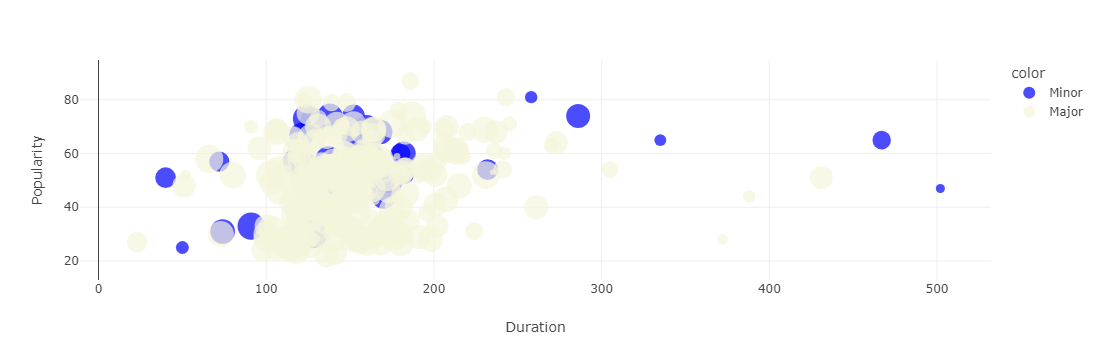

The graph shows how the popularity of songs depends on their duration mod and valece. 
Size of the bubbles shows valence, colour shows mod (blue - minor,white - major).


In [27]:
# 6 Chart
# Bubble chart, not very comfortable for using, but interesting and beautiful
print("Popularity, Duration, Mode and Valence of the songs")
fig6 = px.scatter(
    dt,
    x="Duration",
    y="Popularity",
    size="Valence",
    color=dt["Mode"].replace({0: "Minor", 1: "Major"}),
    hover_name="Title",
    labels={"Duration": "Duration", "Popularity": "Popularity", "Valence": "Valence"},
    color_discrete_map={"Minor": "blue", "Major": "beige"}
)
fig6.show()
print('''The graph shows how the popularity of songs depends on their duration mod and valece. 
Size of the bubbles shows valence, colour shows mod (blue - minor,white - major).''')

Danceability, acousticness, mod, duration and popularity


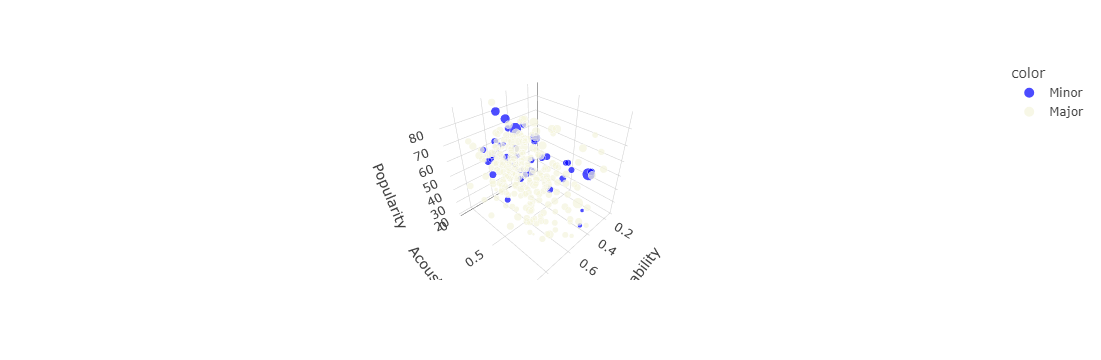

The graph shows how the acoustics and dance quality of the songs are related to their popularity. 
The color of the dots indicates the key, and the size indicates the duration of the song.


In [31]:
# 7 Chart
# 3D scatter just like bubble but in 3D
print("Danceability, acousticness, mod, duration and popularity")
fig7 = px.scatter_3d(
    dt,
    x="Danceability",
    y="Acousticness",
    z="Popularity",
    color=dt["Mode"].replace({0: "Minor", 1: "Major"}),  # Цвет по модусу
    size="Duration",
    color_discrete_map={"Minor": "blue", "Major": "beige"},  # Настройка цветов
    hover_name="Title",
    labels={"Danceability": "Danceability", "Acousticness": "Acousticness", "Popularity": "Popularity"}
)
fig7.show()
print('''The graph shows how the acoustics and dance quality of the songs are related to their popularity. 
The color of the dots indicates the key, and the size indicates the duration of the song.''')

The distribution of songs by mod, key and popularity


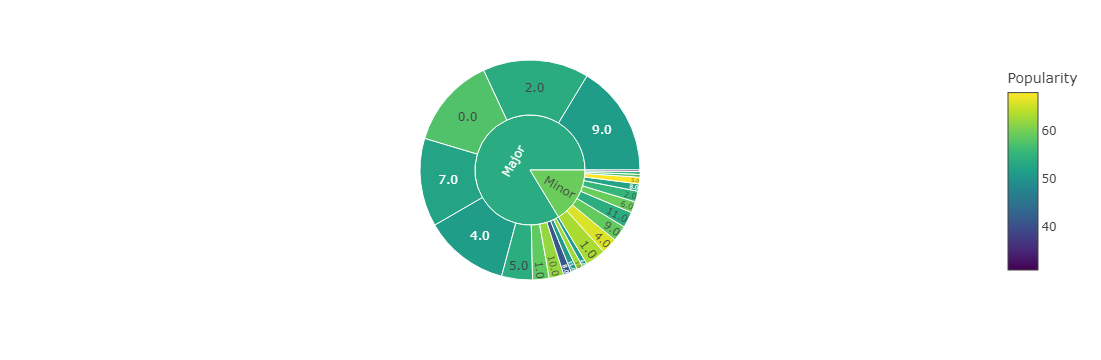

The graph shows the distribution of songs by major and minor, by key, and their popularity(colour).


In [32]:
# 8 chart
# Sunburst chart, this one show dependence of key on mod

print("The distribution of songs by mod, key and popularity")
dt["Mode+"] = dt["Mode"].replace({0: "Minor", 1: "Major"})
fig_sunburst = px.sunburst(
    dt,
    path=["Mode+", "Key"],
    values="Popularity",
    color="Popularity",
    color_continuous_scale="Viridis"
)
fig_sunburst.show()
print("The graph shows the distribution of songs by major and minor, by key, and their popularity(colour).")

Hypothesis: Major songs with high danceability are more popular than major ones with low, and minor songs with high acoustics are more popular than minor ones with low.
**Information from the graph:**
Popularity of major songs with high danceability: 47.93
Popularity of major songs with low danceability: 51.21
Popularity of minor songs with high acousticness: 55.06
Popularity of minor songs with low acousticness: 58.14


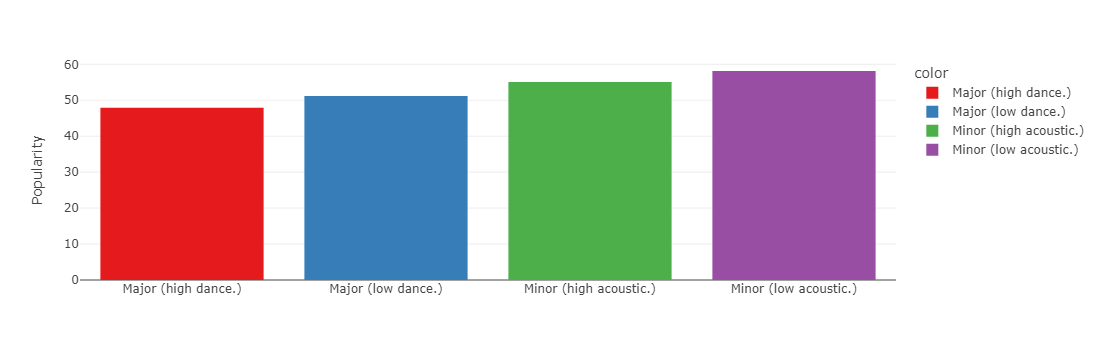

From the graph we can see that our hypothesis is wrong. In fact, it turned out to be the opposite, major songs with low danceability are more popular than with high, the same is for minor songs and acousticness.


In [33]:
# Hypothesis

print('''Hypothesis: Major songs with high danceability are more popular than major ones with low, and minor songs with high acoustics are more popular than minor ones with low.''')

major_songs = dt[dt["Mode"] == 1]
minor_songs = dt[dt["Mode"] == 0]

# Here I find median to understand what is high and what is low acousticness and danceability
danceability_median = dt["Danceability"].median()
acousticness_median = dt["Acousticness"].median()

# Major
major_songs_high_dance = major_songs[major_songs["Danceability"] > danceability_median]
major_songs_low_dance = major_songs[major_songs["Danceability"] <= danceability_median]

major_songs_high_dance_popularity = major_songs_high_dance["Popularity"].mean()
major_songs_low_dance_popularity = major_songs_low_dance["Popularity"].mean()

print("**Information from the graph:**")
print(f"Popularity of major songs with high danceability: {major_songs_high_dance_popularity:.2f}")
print(f"Popularity of major songs with low danceability: {major_songs_low_dance_popularity:.2f}")

# Minor
minor_songs_high_acoustic = minor_songs[minor_songs["Acousticness"] > acousticness_median]
minor_songs_low_acoustic = minor_songs[minor_songs["Acousticness"] <= acousticness_median]

minor_songs_high_acoustic_popularity = minor_songs_high_acoustic["Popularity"].mean()
minor_songs_low_acoustic_popularity = minor_songs_low_acoustic["Popularity"].mean()

print(f"Popularity of minor songs with high acousticness: {minor_songs_high_acoustic_popularity:.2f}")
print(f"Popularity of minor songs with low acousticness: {minor_songs_low_acoustic_popularity:.2f}")

# 9 chart hypothesis
fig9 = px.bar(
    x=["Major (high dance.)", "Major (low dance.)",
       "Minor (high acoustic.)", "Minor (low acoustic.)"],
    y=[major_songs_high_dance_popularity, major_songs_low_dance_popularity,
       minor_songs_high_acoustic_popularity, minor_songs_low_acoustic_popularity],
    labels={"y": "Popularity", "x": ""},
    color=["Major (high dance.)", "Major (low dance.)",
           "Minor (high acoustic.)", "Minor (low acoustic.)"],
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig9.show()

print("From the graph we can see that our hypothesis is wrong. In fact, it turned out to be the opposite, major songs with low danceability are more popular than with high, the same is for minor songs and acousticness.")



In [42]:
# New columns
print("New columns")

# Valence + Danceability
dt["Energy Index"] = dt["Valence"] + dt["Danceability"]

# Complexity
# This one will show complexity of the songs from musical point of view
# Songs with keys farther from the 6 are more complex.
# Minor songs more complex.
# Longer songs are more complex.
# High acousticness is more complex.

dt["Complexity"] = (
    0.3 * abs(dt["Key"] - 6) +
    0.4 * (1 - dt["Mode"]) +
    0.2 * dt["Duration"] +
    0.1 * dt["Acousticness"]
)
# Parameters as 0.3 0.4 ... I put by random

dt[["Title", "Energy Index", "Complexity"]].head(10)

New columns


,Title,Energy Index,Complexity
106,I Me Mine,0.816,30.317900
77,Golden Slumbers,0.658,20.032600
235,The End,0.869,29.900101
38,Carry That Weight,1.247,21.022600
255,Two of Us,1.657,42.909740
181,Oh! Darling,0.971,41.801260
43,Come Together,0.720,52.903020
44,Come and Get It,1.148,30.600186
182,Old Brown Shoe,0.925,40.700171
183,One After 909,1.442,35.003070


In [43]:
print(""" I have added 2 new columns Energy index and Complexity. The first one shows us how energetic sing is, it 
uses 2 other columns: Valence and Danceability.
The second column is harder, it shows complexity of the songs from musical point of view, using columns: Key, Mode, 
Duration, Acousticness (each of them has its own effect coefficient(0.3; 0.4; 0.2; 0.1 accordingly)).
""")

 I have added 2 new columns Energy index and Complexity. The first one shows us how energetic sing is, it 
uses 2 other columns: Valence and Danceability.
The second column is harder, it shows complexity of the songs from musical point of view, using columns: Key, Mode, 
Duration, Acousticness (each of them has its own effect coefficient(0.3; 0.4; 0.2; 0.1 accordingly)).



In [44]:
print("That is the end of my analysis. Davlet and the Beatles were with you, best wishes X")

That is the end of my analysis. Davlet and the Beatles were with you, best wishes X
